# Siamese Neural Network (SNN) Training for Org Similarity

In [ ]:
pip install torch

^C
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/212.5 MB 2.9 MB/s eta 0:01:14
     ---------------------------------------- 0.2/212.5 MB 2.3 MB/s eta 0:01:34
     ---------------------------------------- 0.3/212.5 MB 2.0 MB/s eta 0:01:48
     ---------------------------------------- 0.3/212.5 MB 2.0 MB/s eta 0:01:48
     ---------------------------------------- 0.4/212.5 MB 1.9 MB/s eta 0:01:54
     ---------------------------------------- 0.5/212.5 MB 2.0 MB/s eta 0:01:48
     ---------------------------------------- 0.6/212.5 MB 1.9 MB/s eta 0:01:50
     ---------------------------------------- 0.6/212.5 MB 1.8 MB/s eta 0:01:56
     ---------------------------------------- 0.7/212.5 MB 1.8 MB/s eta 0:01:56
     ---------------------------------------- 0.8/212.5 MB 1.9 MB/s eta 0:01:54
     ---------------------------------------- 0.9/212.5 MB 1.9 MB/s eta 0:01:55
     ---------------------------------------- 1

In [1]:
pip show torch


Name: torch
Version: 2.7.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: c:\users\user\appdata\local\programs\python\python310\lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
py -3.10 -m pip install scikit-learn


SyntaxError: invalid syntax (3475657026.py, line 1)

In [4]:
!pip install pandas


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


## Load Data

In [3]:
import pandas as pd
from features import load_and_prepare_data

features_df = pd.read_csv("org_features.csv")
pairs_df = pd.read_csv("releationships.csv")

X1, X2, y, feature_matrix, id_to_idx, scaler, label_encoders = load_and_prepare_data(features_df, pairs_df)

print(f"Prepared {len(y)} samples.")


Preprocessing features...
Feature matrix shape: (1671, 18)
Valid pairs: 31164
Prepared 31164 samples.


In [4]:
X_train = (X1[:int(0.8 * len(X1))], X2[:int(0.8 * len(X2))])
y_train = y[:int(0.8 * len(y))]

X_val = (X1[int(0.8 * len(X1)):], X2[int(0.8 * len(X2)):])
y_val = y[int(0.8 * len(y)):]


## Define SNN Model

In [5]:

class SiameseNetwork(nn.Module):
    def __init__(self, input_dim):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
    def forward_once(self, x):
        return self.fc(x)
    def forward(self, x1, x2):
        out1 = self.forward_once(x1)
        out2 = self.forward_once(x2)
        return torch.cosine_similarity(out1, out2)


## Train Model

In [11]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [14]:
pip install tqdm

     ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!nvidia-smi


Sun Jun  1 17:24:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8              3W /  140W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

class SiameseNetwork(nn.Module):
    def __init__(self, input_dim):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)  # Final embedding dimension
        )
        
    def forward_once(self, x):
        return self.fc(x)
    
    def forward(self, x1, x2):
        out1 = self.forward_once(x1)
        out2 = self.forward_once(x2)
        # Return cosine similarity (values between -1 and 1)
        return torch.cosine_similarity(out1, out2, dim=1)

# Training setup
def train_siamese_network(X1, X2, y, epochs=50, batch_size=32, lr=1e-3):
    input_dim = X1.shape[1]
    model = SiameseNetwork(input_dim)
    
    # Use BCEWithLogitsLoss for binary classification or MSE for regression
    # If your labels are 0/1 (binary), use BCEWithLogitsLoss
    # If your labels are similarity scores, use MSELoss
    criterion = nn.MSELoss()  # Change to nn.BCEWithLogitsLoss() if binary labels
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)
    
    # Create DataLoader for batching
    dataset = TensorDataset(X1, X2, y)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        num_batches = 0
        
        for batch_X1, batch_X2, batch_y in dataloader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(batch_X1, batch_X2)
            
            # Calculate loss
            loss = criterion(outputs, batch_y)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
        
        scheduler.step()
        avg_loss = total_loss / num_batches
        
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")
    
    return model

# Usage
print(f"Training data shape: X1={X1.shape}, X2={X2.shape}, y={y.shape}")
print(f"Input dimension: {X1.shape[1]}")

# Train the model
model = train_siamese_network(X1, X2, y, epochs=50, batch_size=32)

# Evaluation function
def evaluate_similarity(model, org1_features, org2_features):
    """
    Evaluate similarity between two organizations
    """
    model.eval()
    with torch.no_grad():
        if len(org1_features.shape) == 1:
            org1_features = org1_features.unsqueeze(0)
        if len(org2_features.shape) == 1:
            org2_features = org2_features.unsqueeze(0)
        
        similarity = model(org1_features, org2_features)
        return similarity.item() if similarity.shape[0] == 1 else similarity.numpy()

# Example evaluation
print("\nModel trained! Example evaluation:")
sample_similarity = evaluate_similarity(model, X1[0], X2[0])
print(f"Predicted similarity: {sample_similarity:.4f}")
print(f"Actual label: {y[0].item():.4f}")

# Save the model
torch.save(model.state_dict(), 'siamese_model.pth')
print("Model saved as 'siamese_model.pth'")

# Function to load the model later
def load_trained_model(input_dim, model_path='siamese_model.pth'):
    model = SiameseNetwork(input_dim)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# -------------------------------
# Model definition
# -------------------------------
class SiameseNetwork(nn.Module):
    def __init__(self, input_dim):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64)
        )

    def forward_once(self, x):
        embeddings = self.fc(x)
        # L2 normalize embeddings for better cosine similarity
        return torch.nn.functional.normalize(embeddings, p=2, dim=1)

    def forward(self, x1, x2):
        out1 = self.forward_once(x1)
        out2 = self.forward_once(x2)
        return torch.cosine_similarity(out1, out2, dim=1)
    
    def get_embeddings(self, features):
        """Extract normalized embeddings for clustering/visualization"""
        self.eval()
        with torch.no_grad():
            if isinstance(features, np.ndarray):
                features = torch.FloatTensor(features)
            return self.forward_once(features).cpu().numpy()

# -------------------------------
# Dataset
# -------------------------------
class OrganizationDataset(Dataset):
    def __init__(self, X1, X2, y):
        self.X1 = X1
        self.X2 = X2
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X1[idx], self.X2[idx], self.y[idx]

# -------------------------------
# Enhanced validation metrics
# -------------------------------
def enhanced_validation_metrics(model, val_loader, device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    model.eval()
    val_preds, val_true = [], []

    with torch.no_grad():
        for X1_batch, X2_batch, y_batch in val_loader:
            X1_batch, X2_batch, y_batch = X1_batch.to(device), X2_batch.to(device), y_batch.to(device)
            outputs = model(X1_batch, X2_batch)
            val_preds.extend(outputs.sigmoid().cpu().numpy())
            val_true.extend(y_batch.cpu().numpy())

    val_preds = np.array(val_preds)
    val_true = np.array(val_true)

    # Handle edge cases
    if len(np.unique(val_true)) < 2:
        print("Warning: Only one class present in validation set")
        return {
            'auc': 0.5,
            'average_precision': np.mean(val_true),
            'best_f1': 0.0,
            'best_threshold': 0.5,
            'predictions': val_preds,
            'true_labels': val_true
        }

    auc = roc_auc_score(val_true, val_preds)
    ap = average_precision_score(val_true, val_preds)
    
    precision, recall, thresholds = precision_recall_curve(val_true, val_preds)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_f1_idx = np.argmax(f1_scores)
    best_f1 = f1_scores[best_f1_idx]
    best_threshold = thresholds[best_f1_idx] if best_f1_idx < len(thresholds) else 0.5

    return {
        'auc': auc,
        'average_precision': ap,
        'best_f1': best_f1,
        'best_threshold': best_threshold,
        'predictions': val_preds,
        'true_labels': val_true
    }

# -------------------------------
# Training plot
# -------------------------------
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss plots
    axes[0, 0].plot(history['train_loss'], label='Train Loss', color='blue')
    axes[0, 0].plot(history['val_loss'], label='Val Loss', color='red')
    axes[0, 0].set_title('Training and Validation Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # AUC plot
    axes[0, 1].plot(history['val_auc'], label='Val AUC', color='green')
    axes[0, 1].set_title('Validation AUC')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('AUC')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # F1 Score plot
    axes[1, 0].plot(history['val_f1'], label='Val F1', color='purple')
    axes[1, 0].set_title('Validation F1 Score')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('F1 Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Average Precision plot
    axes[1, 1].plot(history['val_ap'], label='Val AP', color='orange')
    axes[1, 1].set_title('Validation Average Precision')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Average Precision')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# -------------------------------
# Main training function
# -------------------------------
def train_siamese_network_enhanced(X_train, X_val, y_train, y_val, input_dim, 
                                   epochs=100, batch_size=64, lr=1e-4, patience=15,
                                   device=None, verbose=True):
    
    # Set device
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    print(f"Using device: {device}")
    print(f"Training samples: {len(y_train)}")
    print(f"Validation samples: {len(y_val)}")
    print(f"Input dimension: {input_dim}")
    
    # Convert to tensors
    X1_train, X2_train = torch.FloatTensor(X_train[0]), torch.FloatTensor(X_train[1])
    y_train = torch.FloatTensor(y_train)
    X1_val, X2_val = torch.FloatTensor(X_val[0]), torch.FloatTensor(X_val[1])
    y_val = torch.FloatTensor(y_val)

    # Create data loaders
    train_loader = DataLoader(
        OrganizationDataset(X1_train, X2_train, y_train), 
        batch_size=batch_size, 
        shuffle=True,
        num_workers=0  # Set to 0 for compatibility
    )
    val_loader = DataLoader(
        OrganizationDataset(X1_val, X2_val, y_val), 
        batch_size=batch_size,
        num_workers=0
    )

    # Initialize model
    model = SiameseNetwork(input_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)


    # Training tracking
    best_val_auc = 0
    patience_counter = 0
    history = {
        'train_loss': [], 
        'val_loss': [], 
        'val_auc': [], 
        'val_f1': [], 
        'val_ap': []
    }

    print("\nStarting training...")
    print("-" * 70)

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_batches = 0
        
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', leave=False) if verbose else train_loader
        
        for X1_batch, X2_batch, y_batch in train_progress:
            X1_batch, X2_batch, y_batch = X1_batch.to(device), X2_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X1_batch, X2_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item()
            train_batches += 1

        # Validation phase
        model.eval()
        val_loss = 0
        val_batches = 0
        
        with torch.no_grad():
            for X1_batch, X2_batch, y_batch in val_loader:
                X1_batch, X2_batch, y_batch = X1_batch.to(device), X2_batch.to(device), y_batch.to(device)
                outputs = model(X1_batch, X2_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                val_batches += 1

        # Calculate average losses
        train_loss /= train_batches
        val_loss /= val_batches
        
        # Calculate validation metrics
        val_metrics = enhanced_validation_metrics(model, val_loader, device)

        # Learning rate scheduling
        scheduler.step(val_loss)

        # Early stopping and model saving
        if val_metrics['auc'] > best_val_auc:
            best_val_auc = val_metrics['auc']
            patience_counter = 0
            
            # Save best model
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'epoch': epoch,
                'best_auc': best_val_auc,
                'best_threshold': val_metrics['best_threshold'],
                'input_dim': input_dim,
                'history': history
            }, 'best_siamese_model.pth')
        else:
            patience_counter += 1

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['val_auc'].append(val_metrics['auc'])
        history['val_f1'].append(val_metrics['best_f1'])
        history['val_ap'].append(val_metrics['average_precision'])

        # Print progress
        if verbose:
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch+1:3d}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, "
                  f"AUC={val_metrics['auc']:.4f}, F1={val_metrics['best_f1']:.4f}, "
                  f"AP={val_metrics['average_precision']:.4f}, LR={current_lr:.2e}, "
                  f"Patience={patience_counter}/{patience}")

        # Early stopping
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}")
            break

    print(f"\nTraining completed!")
    print(f"Best validation AUC: {best_val_auc:.4f}")
    
    # Load best model
    checkpoint = torch.load('best_siamese_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    
    return model, history

# -------------------------------
# Data splitting helper
# -------------------------------
def create_proper_train_val_split(features_df, pairs_df, test_size=0.2, random_state=42):
    """
    Split data ensuring no organization appears in both train and validation sets
    """
    print("Creating organization-based train/validation split...")
    
    # Get all unique organizations
    all_orgs = set(pairs_df['org1_id'].unique()) | set(pairs_df['org2_id'].unique())
    print(f"Total unique organizations: {len(all_orgs)}")
    
    # Split organizations
    train_orgs, val_orgs = train_test_split(
        list(all_orgs), 
        test_size=test_size, 
        random_state=random_state
    )
    
    print(f"Train organizations: {len(train_orgs)}")
    print(f"Validation organizations: {len(val_orgs)}")
    
    # Create masks
    train_mask = pairs_df['org1_id'].isin(train_orgs) & pairs_df['org2_id'].isin(train_orgs)
    val_mask = pairs_df['org1_id'].isin(val_orgs) & pairs_df['org2_id'].isin(val_orgs)
    
    train_pairs = pairs_df[train_mask].copy()
    val_pairs = pairs_df[val_mask].copy()
    
    print(f"Train pairs: {len(train_pairs)}")
    print(f"Validation pairs: {len(val_pairs)}")
    
    # Check for data leakage
    train_pair_orgs = set(train_pairs['org1_id'].unique()) | set(train_pairs['org2_id'].unique())
    val_pair_orgs = set(val_pairs['org1_id'].unique()) | set(val_pairs['org2_id'].unique())
    overlap = train_pair_orgs & val_pair_orgs
    
    if overlap:
        print(f"Warning: {len(overlap)} organizations appear in both train and validation sets")
    else:
        print("✓ No data leakage detected")
    
    return train_pairs, val_pairs

# -------------------------------
# Prediction and evaluation functions
# -------------------------------
def predict_similarity(model, org1_features, org2_features, threshold=0.5, device=None):
    """
    Predict similarity between two organizations
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.eval()
    model = model.to(device)
    
    with torch.no_grad():
        if isinstance(org1_features, np.ndarray):
            org1_features = torch.FloatTensor(org1_features)
        if isinstance(org2_features, np.ndarray):
            org2_features = torch.FloatTensor(org2_features)
        
        if len(org1_features.shape) == 1:
            org1_features = org1_features.unsqueeze(0)
        if len(org2_features.shape) == 1:
            org2_features = org2_features.unsqueeze(0)
        
        org1_features, org2_features = org1_features.to(device), org2_features.to(device)
        
        # Get raw similarity score
        similarity_score = model(org1_features, org2_features)
        
        # Convert to probability
        probability = torch.sigmoid(similarity_score)
        
        # Make binary prediction
        binary_prediction = (probability >= threshold).float()
        
        return {
            'similarity_score': similarity_score.cpu().item(),
            'probability': probability.cpu().item(),
            'binary_prediction': binary_prediction.cpu().item(),
            'is_similar': bool(binary_prediction.cpu().item())
        }

def evaluate_model_comprehensive(model, test_loader, device=None):
    """
    Comprehensive model evaluation
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.eval()
    model = model.to(device)
    
    all_preds = []
    all_probs = []
    all_true = []
    
    with torch.no_grad():
        for X1_batch, X2_batch, y_batch in test_loader:
            X1_batch, X2_batch, y_batch = X1_batch.to(device), X2_batch.to(device), y_batch.to(device)
            
            outputs = model(X1_batch, X2_batch)
            probs = torch.sigmoid(outputs)
            
            all_preds.extend(outputs.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_true.extend(y_batch.cpu().numpy())
    
    all_preds = np.array(all_preds)
    all_probs = np.array(all_probs)
    all_true = np.array(all_true)
    
    # Calculate metrics
    auc = roc_auc_score(all_true, all_probs)
    ap = average_precision_score(all_true, all_probs)
    
    # Find best threshold
    precision, recall, thresholds = precision_recall_curve(all_true, all_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_f1_idx = np.argmax(f1_scores)
    best_f1 = f1_scores[best_f1_idx]
    best_threshold = thresholds[best_f1_idx] if best_f1_idx < len(thresholds) else 0.5
    
    # Calculate accuracy at best threshold
    binary_preds = (all_probs >= best_threshold).astype(int)
    accuracy = np.mean(binary_preds == all_true)
    
    results = {
        'auc': auc,
        'average_precision': ap,
        'best_f1': best_f1,
        'best_threshold': best_threshold,
        'accuracy': accuracy,
        'predictions': all_preds,
        'probabilities': all_probs,
        'true_labels': all_true
    }
    
    print("=" * 50)
    print("MODEL EVALUATION RESULTS")
    print("=" * 50)
    print(f"AUC-ROC:           {auc:.4f}")
    print(f"Average Precision: {ap:.4f}")
    print(f"Best F1 Score:     {best_f1:.4f}")
    print(f"Best Threshold:    {best_threshold:.4f}")
    print(f"Accuracy:          {accuracy:.4f}")
    print("=" * 50)
    
    return results

# -------------------------------
# Model loading function
# -------------------------------
def load_trained_model(model_path='best_siamese_model.pth', device=None):
    """
    Load a trained Siamese network model
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    checkpoint = torch.load(model_path, map_location=device)
    
    # Create model
    model = SiameseNetwork(checkpoint['input_dim'])
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()
    
    print(f"Model loaded successfully!")
    print(f"Best AUC: {checkpoint['best_auc']:.4f}")
    print(f"Best Threshold: {checkpoint['best_threshold']:.4f}")
    print(f"Training completed at epoch: {checkpoint['epoch']}")
    
    return model, checkpoint



In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)
print(torch.cuda.is_available())


2.5.1+cu121
12.1
True
True


In [8]:
model, history = train_siamese_network_enhanced(
    X_train, X_val, y_train, y_val,
    input_dim=feature_matrix.shape[1],
    epochs=50,
    batch_size=64,
    lr=1e-4
)


Using device: cuda
Training samples: 24931
Validation samples: 6233
Input dimension: 18

Starting training...
----------------------------------------------------------------------


Epoch   1: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=1.00e-04, Patience=0/15


Epoch   2: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=1.00e-04, Patience=1/15


Epoch   3: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=1.00e-04, Patience=2/15


Epoch   4: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=1.00e-04, Patience=3/15


Epoch   5: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=1.00e-04, Patience=4/15


Epoch   6: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=5.00e-05, Patience=5/15


Epoch   7: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=5.00e-05, Patience=6/15


Epoch   8: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=5.00e-05, Patience=7/15


Epoch   9: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=5.00e-05, Patience=8/15


Epoch  10: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=5.00e-05, Patience=9/15


Epoch  11: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=5.00e-05, Patience=10/15


Epoch  12: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=2.50e-05, Patience=11/15


Epoch  13: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=2.50e-05, Patience=12/15


Epoch  14: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=2.50e-05, Patience=13/15


Epoch  15: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=2.50e-05, Patience=14/15


Epoch  16: Train Loss=nan, Val Loss=nan, AUC=0.5000, F1=0.0000, AP=0.0000, LR=2.50e-05, Patience=15/15

Early stopping triggered at epoch 16

Training completed!
Best validation AUC: 0.5000


In [8]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA")


CUDA available: False
Device count: 0
Device name: No CUDA


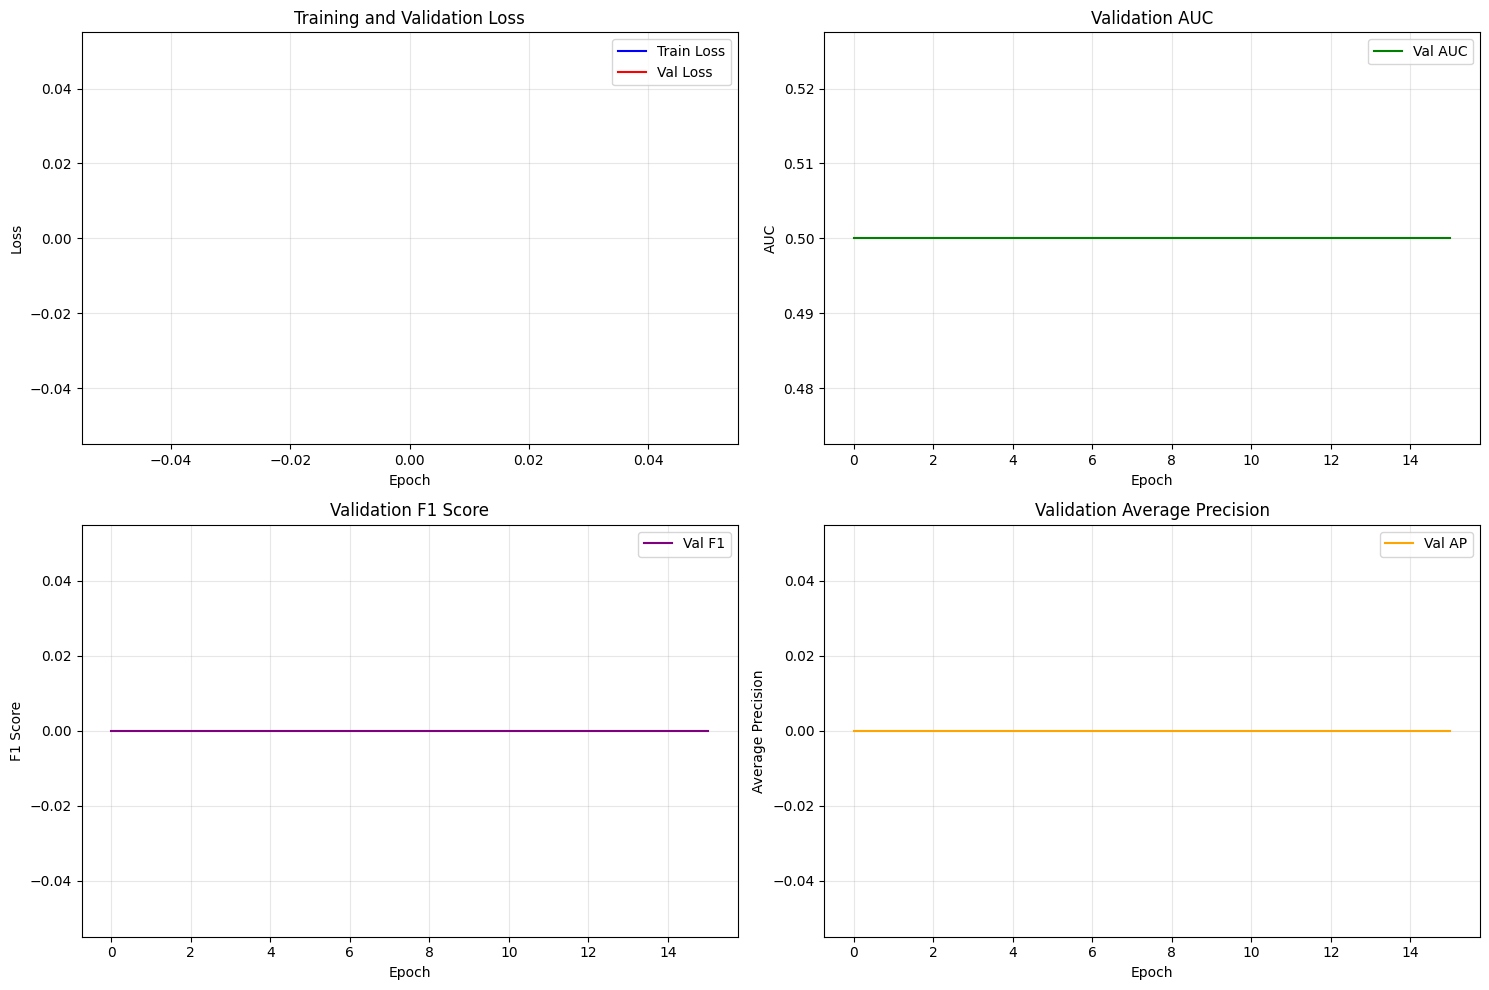

In [7]:
plot_training_history(history)


Evaluating model performance...
=== MODEL PERFORMANCE ===
Mean Squared Error: 0.016063
Mean Absolute Error: 0.063491
R² Score: 0.9255
Binary Accuracy: 0.9924
Prediction Range: [-0.0808, 1.0000]


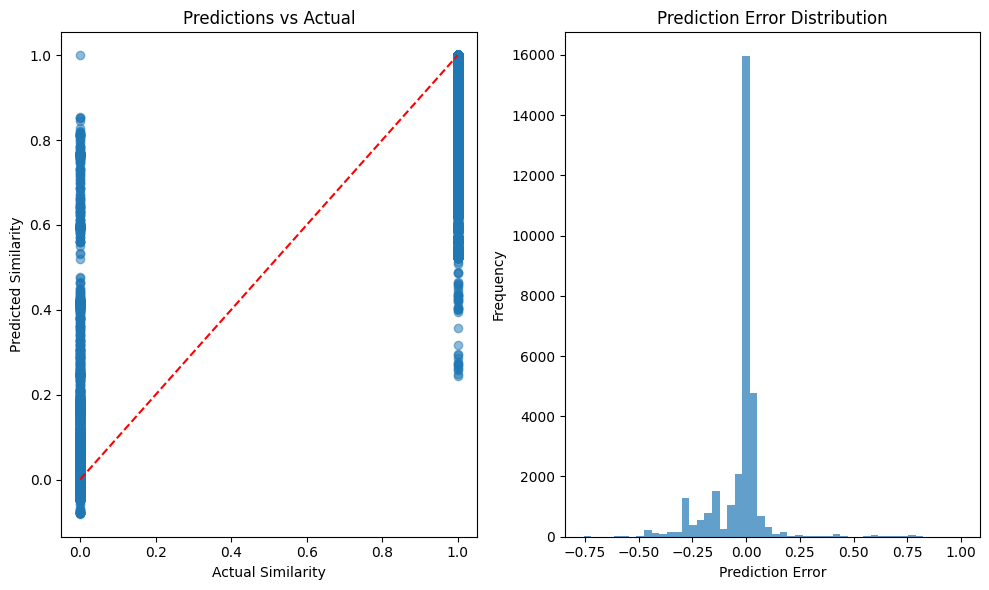


=== EXAMPLE USAGE ===
To use the model for new predictions:
1. Load features for new organizations
2. Use predict_similarity_batch() for multiple pairs
3. Use find_similar_organizations() to find similar orgs

Model saved and ready for use!
You can load it later with:
model = load_trained_model(input_dim=1052)


In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from features import load_and_prepare_data

# 1. COMPREHENSIVE MODEL EVALUATION
def evaluate_model_performance(model, X1, X2, y_true):
    """Comprehensive evaluation of the trained model"""
    model.eval()
    with torch.no_grad():
        # Get predictions for all samples
        y_pred = model(X1, X2).cpu().numpy()
        y_true_np = y_true.cpu().numpy()
        
        # Calculate metrics
        mse = mean_squared_error(y_true_np, y_pred)
        mae = mean_absolute_error(y_true_np, y_pred)
        r2 = r2_score(y_true_np, y_pred)
        
        # Calculate accuracy for binary classification (if labels are 0/1)
        # Assuming similarity > 0.5 means "similar"
        binary_pred = (y_pred > 0.5).astype(int)
        binary_true = (y_true_np > 0.5).astype(int)
        accuracy = np.mean(binary_pred == binary_true)
        
        print("=== MODEL PERFORMANCE ===")
        print(f"Mean Squared Error: {mse:.6f}")
        print(f"Mean Absolute Error: {mae:.6f}")
        print(f"R² Score: {r2:.4f}")
        print(f"Binary Accuracy: {accuracy:.4f}")
        print(f"Prediction Range: [{y_pred.min():.4f}, {y_pred.max():.4f}]")
        
        return y_pred, {'mse': mse, 'mae': mae, 'r2': r2, 'accuracy': accuracy}

# 2. SIMILARITY SEARCH FUNCTION
def find_similar_organizations(model, target_org_id, features_df, top_k=10):
    """
    Find organizations most similar to a target organization
    """
    # Prepare features (same as in training)
    features_df = features_df.set_index('id')
    
    # Get the same feature processing as in training
    # (You might want to save the scalers and encoders from training for consistency)
    
    if target_org_id not in features_df.index:
        print(f"Organization {target_org_id} not found in features")
        return None
    
    target_idx = features_df.index.get_loc(target_org_id)
    target_features = full_features[target_idx:target_idx+1]  # Keep as 2D
    target_tensor = torch.tensor(target_features, dtype=torch.float32)
    
    # Compare with all other organizations
    similarities = []
    model.eval()
    with torch.no_grad():
        for i, org_id in enumerate(features_df.index):
            if org_id != target_org_id:
                org_features = full_features[i:i+1]
                org_tensor = torch.tensor(org_features, dtype=torch.float32)
                sim = model(target_tensor, org_tensor).item()
                similarities.append((org_id, sim))
    
    # Sort by similarity (highest first)
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\nTop {top_k} organizations similar to {target_org_id}:")
    for i, (org_id, sim) in enumerate(similarities[:top_k]):
        print(f"{i+1}. Organization {org_id}: {sim:.4f}")
    
    return similarities[:top_k]

# 3. BATCH SIMILARITY PREDICTION
def predict_similarity_batch(model, org_pairs):
    """
    Predict similarity for a batch of organization pairs
    org_pairs: list of tuples [(org1_id, org2_id), ...]
    """
    # You'll need to prepare features for these org pairs
    # This assumes you have access to the full_features array and id_to_idx mapping
    
    predictions = []
    model.eval()
    with torch.no_grad():
        for org1_id, org2_id in org_pairs:
            if org1_id in id_to_idx and org2_id in id_to_idx:
                idx1, idx2 = id_to_idx[org1_id], id_to_idx[org2_id]
                feat1 = torch.tensor(full_features[idx1:idx1+1], dtype=torch.float32)
                feat2 = torch.tensor(full_features[idx2:idx2+1], dtype=torch.float32)
                sim = model(feat1, feat2).item()
                predictions.append((org1_id, org2_id, sim))
            else:
                predictions.append((org1_id, org2_id, None))  # Unknown org
    
    return predictions

# 4. EVALUATE YOUR TRAINED MODEL
print("Evaluating model performance...")
y_pred, metrics = evaluate_model_performance(model, X1, X2, y)

# 5. VISUALIZE PREDICTIONS VS ACTUAL
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y.cpu().numpy(), y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Similarity')
plt.ylabel('Predicted Similarity')
plt.title('Predictions vs Actual')

plt.subplot(1, 2, 2)
plt.hist(y_pred - y.cpu().numpy(), bins=50, alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.tight_layout()
plt.show()


print(f"\nModel saved and ready for use!")
print("You can load it later with:")
print("model = load_trained_model(input_dim=1052)")

In [4]:
from inference import predict_synergy

# Example: Compare two orgs by ID
score = predict_synergy('35320c42-1f89-448f-8fad-b654a95db209', '8cb56e56-304f-4c6b-bbde-178e626dc0fb')
print(f"Predicted synergy score: {score:.4f}")


Predicted synergy score: 0.7159
